In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
csv = [pd.read_csv(f"N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]


In [96]:
ice = pd.concat(csv, axis=0, ignore_index=True)
ice.shape

(541, 6)

In [120]:
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20 , np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
df = ice.dropna()
ice.isna().sum()

year         0
mo           0
data-type    0
region       0
extent       2
area         3
dtype: int64

In [121]:
grouped_mean = ice.groupby(['year','mo','data-type','region']).mean().reset_index()


In [129]:
grouped_mean.tail(12)

,year,mo,data-type,region,extent,area
529,2022,12,Goddard,N,11.89,10.27
530,2023,1,NRTSI-G,N,13.35,11.83
531,2023,2,NRTSI-G,N,14.18,12.57
532,2023,3,NRTSI-G,N,14.44,12.87
533,2023,4,NRTSI-G,N,13.99,12.50
534,2023,5,NRTSI-G,N,12.83,11.02
535,2023,6,NRTSI-G,N,10.96,8.71
536,2023,7,NRTSI-G,N,8.18,5.54
537,2023,8,NRTSI-G,N,5.57,3.52
538,2023,9,NRTSI-G,N,4.37,2.79


In [124]:
reg = grouped_mean.groupby('year')[['extent', 'area']].mean().reset_index()

In [131]:
reg.head()

,year,extent,area
0,1978,12.660000,9.970000
1,1979,12.350000,9.441667
2,1980,12.348333,9.388333
3,1981,12.146667,9.146667
4,1982,12.467500,9.525000


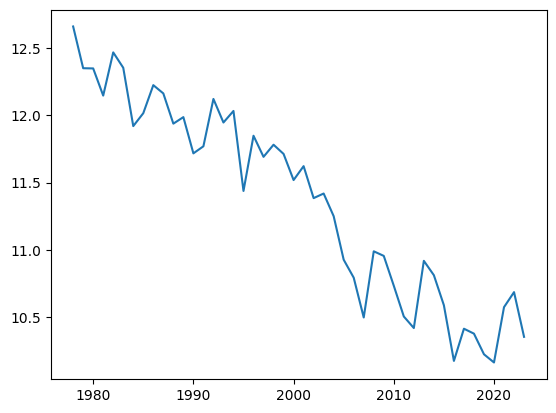

In [130]:
plt.plot(reg['year'],reg['extent'])